# Assignment 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Student ID: *M112040034*

#### Name: *李祐瑄*

In [ ]:
!pip install --pre pycaret[full] -qq
!pip install cleanlab -qq
!pip install modAL -qq
!pip install snorkel -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline


## Q1: Low-code Machine Learning with Ames housing dataset

In this question, we are going to examine the low-code ML framework. Assuming we are assigned to deal with a different housing dataset after we finish the California census data project.

We will use a modified version of the Ames housing dataset. The original data was compiled by Dean De Cock for use in data science education and published in [De Cock, D. (2011)](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). The modified version contains 2930 rows with 79 columns describing every aspect of residential homes in Ames, Iowa.  We will only use a subset of features and be sure to set the random seed to 2023 in the following problems.

Firstly, execute the following code snippet for data preparation:

In [ ]:
import numpy as np
import pandas as pd
!pip install --upgrade packaging
from pycaret.regression import *

# Prepare data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ames.csv")            
low_cardinality_cols = [cname for cname in df.columns if df[cname].nunique() < 10 and 
                        df[cname].dtype == "object"]
# Select numeric columns
numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
df = df[my_cols].copy()
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 KB 2.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 1.30.0 requires packaging<22, but you have packaging 23.0 which is incompatible.


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,MiscVal,MoSold,YearSold,SalePrice
0,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,210.0,62.0,0.0,0.0,0.0,0.0,0.0,5,2010,215000
1,Residential_High_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Feedr,Norm,...,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6,2010,105000
2,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6,2010,172000
3,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2010,244000
4,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3,2010,189900


(a) Split 5% of data as the test set for testing purposes using `train_test_split()`. (5%)

In [ ]:
# coding your answer here.
from sklearn.model_selection import train_test_split
X = df.drop(['SalePrice'], axis=1, inplace=False)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=2023)

(b) Use the `setup()` function to prepare the dataset for our ML model by fulfilling the following requirements: (10%)

* Features: All features in the `df` data frame, except the `SalePrice`
* Target: `SalePrice` 
* Split 25% of the data into the validation set
* Perform standardization for all features (You can assume that the data type belongs to `object` are categorical variables; otherwise, it is numerical variables)
* Perform one-hot encoding for all categorical features (`PyCaret` will discard one variable after one-hot encoding if the feature only has two levels and is regarded as an ordinal feature automatically, you do not have to change this behavior)

Hint: You may find the documentation (https://pycaret.readthedocs.io/en/latest/api/regression.html) useful. Note that PyCaret will [scale all features by default](https://github.com/pycaret/pycaret/issues/3076).

In [ ]:
# coding your answer here.
Q1_b_data = setup(data = df, target = 'SalePrice', train_size = 0.75, normalize = True,
          categorical_features=[col for col in df.columns if df[col].dtype=='object'],session_id=2023)

,Description,Value
0,Session id,2023
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(2930, 73)"
4,Transformed data shape,"(2930, 249)"
5,Transformed train set shape,"(2197, 249)"
6,Transformed test set shape,"(733, 249)"
7,Ordinal features,2
8,Numeric features,32
9,Categorical features,40


(c) Use `compare_models()` to perform 5-fold cross-validation by comparing the following models and selecting the best three models according to the MAE (mean absolute error) measure. (5%)

- Linear regression, Lasso regression, ridge regression, decision tree regressor, k-nearest neighbor regressor, random forest regressor, xgboost, lightgbm, and catboost.

List the top 3 best models according to the MAE measure.

In [ ]:
# coding your answer here.
# 多設置fold = 5
Q1_c_data = setup(data = df, target = 'SalePrice', train_size = 0.75, normalize = True, fold = 5,
          categorical_features=[col for col in df.columns if df[col].dtype=='object'],session_id=2023)
# 比較模型
models = ['lr', 'lasso', 'ridge', 'dt', 'knn', 'rf', 'xgboost', 'lightgbm', 'catboost']
best_models = compare_models(sort='MAE', n_select=3, include=models)

# List the top 3 best model
print(best_models)

,Description,Value
0,Session id,2023
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(2930, 73)"
4,Transformed data shape,"(2930, 249)"
5,Transformed train set shape,"(2197, 249)"
6,Transformed test set shape,"(733, 249)"
7,Ordinal features,2
8,Numeric features,32
9,Categorical features,40


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,14785.3429,602989747.7070,24501.7981,0.9022,0.1338,0.0910,0.5940
lightgbm,Light Gradient Boosting Machine,16117.2201,715685677.8010,26722.0154,0.8839,0.1419,0.0975,1.4680
xgboost,Extreme Gradient Boosting,17060.4802,686305684.1028,26182.3072,0.8891,0.1488,0.1045,0.8040
rf,Random Forest Regressor,17234.7235,788507502.4644,28005.7573,0.8712,0.1540,0.1073,0.5560
lasso,Lasso Regression,18248.3112,1182514207.5469,33065.7442,0.8073,0.1886,0.1150,0.7140
ridge,Ridge Regression,18284.6441,1154222208.9362,32813.4665,0.8118,0.1890,0.1153,0.6740
knn,K Neighbors Regressor,25717.1729,1577563022.1475,39714.1641,0.7453,0.2126,0.1585,0.4540
dt,Decision Tree Regressor,26226.8666,1646586416.5478,40518.9729,0.7341,0.2222,0.1582,0.4420
lr,Linear Regression,12246015428835188.0000,33363313727391548937212132428087296.0000,161170797341673216.0000,-5570043227475477323055104.0000,3.0307,112332274094.0434,1.5120


Processing:   0%|          | 0/43 [00:00<?, ?it/s]

[<catboost.core.CatBoostRegressor object at 0x7f5fb10252b0>, LGBMRegressor(random_state=2023), XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=2023, ...)]


> Ans: *1.catboost, 2.lightgbm, 3.xgboost*

(d) Choose the best model from (c) using `create_model()` and report the MAE on the test set in (a). (5%)

In [ ]:
# coding your answer here.
from sklearn.metrics import mean_absolute_error
# 建立模型(最佳為catboost)
catboost_model = create_model('catboost')
# 使用測試集去預測
predictions = predict_model(catboost_model, data=X_test)
# 計算MAE
mae = mean_absolute_error(predictions['prediction_label'], y_test)
print('MAE:', mae)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15181.1625,632360871.2821,25146.7865,0.8974,0.1175,0.0804
1,14699.0084,597562684.9455,24445.0953,0.8868,0.1216,0.0851
2,14802.2155,594365028.7726,24379.6027,0.9125,0.1279,0.0899
3,14923.3824,717714937.9042,26790.2023,0.8833,0.1854,0.1159
4,14320.9459,472945215.6308,21747.3036,0.9310,0.1167,0.0835
Mean,14785.3429,602989747.7070,24501.7981,0.9022,0.1338,0.0910
Std,282.5353,78790800.5743,1628.3851,0.0176,0.0261,0.0128


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

MAE: 14941.32125708433


> Ans: *MAE = 14941.32125708433*

## Q2: Dealing with unlabeled dataset

In this question, we will practice the data preparation skill often used in a real-world project.

Assuming in the startup company, we are given an unlabeled dataset `data.csv` and a crowdsourcing labels `crowdsourcing.csv` from 50 workers. The data contains two features and 247 sample points. Each sample point belongs to one of 3 different classes. This is a practice project. Therefore we have access to the ground truth label `labels.csv`, **but the label can only be used to measure the accuracy, answer the queries from the active learning model, or initialize the active learning model. It can not be used in all the other training processes.** Be sure to set the random seed to 2023 in the following problems.

Firstly, read the dataset and divide it into training and testing sets using the following code snippet:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Q2_dataset/data.csv', names=[0,1])
true_labels = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/Q2_dataset/labels.csv", delimiter=',')
multiannotator_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Q2_dataset/crowdsourcing.csv')

In [ ]:
X_train, X_test, multiannotator_labels, ano_unseen, Y_train, Y_test  = train_test_split(X, multiannotator_labels, true_labels, test_size=0.25, random_state=2023)

(a) We decide to use active learning first. Try randomly selecting one sample from each class in the training set and putting the remaining dataset into the query pool. Use the above three training samples and the corresponding training labels to train the following logistic regression classifier with L2 penalty: (10%)

```python
LogisticRegression(solver='liblinear', penalty='l2', C=10, random_state=2023)
```

Report the classification accuracy on the test set for this classifier. 

In [ ]:
from sklearn.linear_model import LogisticRegression

classes = np.unique(Y_train)#取得訓練集中的類別
# 隨機選擇每個類別的一個樣本
selected_index = []
for c in classes:
    c_index = np.where(Y_train == c)[0] #獲取屬於該類別的樣本索引值
    np.random.seed(2023)
    sel_index = np.random.choice(c_index, size=1, replace=False)#從該類別中隨機選擇一個樣本
    selected_index.extend(sel_index) #將選擇的樣本索引加入倒此list中

# 建立training set & query pool
X_train_al = X_train.iloc[selected_index]#從訓練集中分離出選中的樣本
Y_train_al = Y_train[selected_index]#對應的label
X_pool = X_train.drop(index=selected_index)#將剩餘的樣本作為query pool
Y_pool = Y_train[np.setdiff1d(range(len(Y_train)), selected_index)]

# 訓練邏輯回歸分類器Classifier
clf = LogisticRegression(solver='liblinear', penalty='l2', C=10, random_state=2023)
clf.fit(X_train_al, Y_train_al)
from sklearn.metrics import accuracy_score

# 使用測試即進行預測
Y_pred = clf.predict(X_test)

# 計算模型準確率
acc = accuracy_score(Y_test, Y_pred)
print("Model accuracy:", acc)

Model accuracy: 0.7903225806451613


> Ans: *0.7903225806451613*

(b) Now use the model in (a) and run the active learning with pool-based sampling for 20 epochs using the `ActiveLearner` from [`modAL`](https://modal-python.readthedocs.io/en/latest/). The query strategy should be set to `uncertainty_sampling`, and you can use the ground truth label to answer the query. (10%)

Report the final classification accuracy on the test set and plot the line plot for the classification accuracy on the test set versus the epochs.

Query no. 1, accuracy: 0.7258
Query no. 2, accuracy: 0.7742
Query no. 3, accuracy: 0.7903
Query no. 4, accuracy: 0.7903
Query no. 5, accuracy: 0.9355
Query no. 6, accuracy: 0.8387
Query no. 7, accuracy: 0.8871
Query no. 8, accuracy: 0.9355
Query no. 9, accuracy: 0.8548
Query no. 10, accuracy: 0.8871
Query no. 11, accuracy: 0.9194
Query no. 12, accuracy: 0.8710
Query no. 13, accuracy: 0.9032
Query no. 14, accuracy: 0.9194
Query no. 15, accuracy: 0.8871
Query no. 16, accuracy: 0.9032
Query no. 17, accuracy: 0.8871
Query no. 18, accuracy: 0.9194
Query no. 19, accuracy: 0.9194
Query no. 20, accuracy: 0.9194


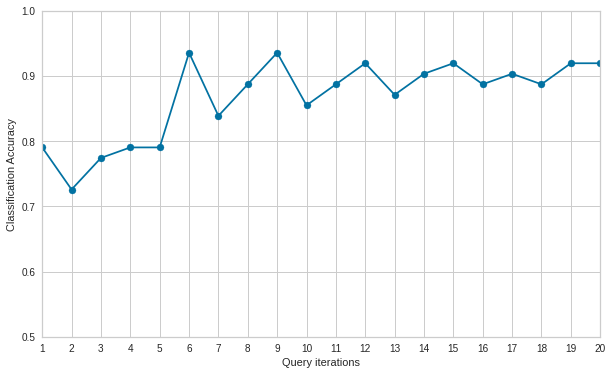

Final classification accuracy: 0.9193548387096774


In [ ]:
from pandas.core.common import random_state
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

# 初始化主動學習器
learner = ActiveLearner(
    estimator=clf,
    query_strategy=uncertainty_sampling,
    X_training=X_train_al.values, 
    y_training=Y_train_al,
)

# 初始化變數(存放20次的準確率)
accuracy_history = [accuracy_score(Y_test, learner.predict(X_test))]

n_queries = 20
# 主動學習迭代
for idx in range(n_queries):
    # 使用uncertainty_sampling選擇最具有不確定性的樣本
    query_idx, query_instance = learner.query(X_pool.values)
    
    # 用Ground Truth標記該樣本
    learner.teach(X=X_pool.iloc[query_idx].values, y=Y_pool[query_idx])
    
    # 從query pool中移除已標記的樣本
    X_pool = X_pool.drop(index=X_pool.iloc[query_idx].index)
    Y_pool = np.delete(Y_pool, query_idx)
    
    # 記錄並顯示分類準確率變化
    accuracy = accuracy_score(Y_test, learner.predict(X_test))
    accuracy_history.append(accuracy)
    print('Query no. %d, accuracy: %.4f' % (idx+1, accuracy))

# 繪製準確率變化折線圖
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, n_queries+2), accuracy_history)
ax.scatter(range(1, n_queries+2), accuracy_history)
ax.set_xlabel('Query iterations')
ax.set_xticks(range(1, n_queries+2, 1))
ax.set_ylabel('Classification Accuracy')
ax.set_xlim([1, 20])
ax.set_ylim([0.5, 1.0])
ax.grid(True)
plt.show()

# 計算並顯示最終分類準確率
final_acc = accuracy_score(Y_test, learner.predict(X_test))
print('Final classification accuracy:', final_acc)


> Ans: *Final classification accuracy: 0.9193548387096774*
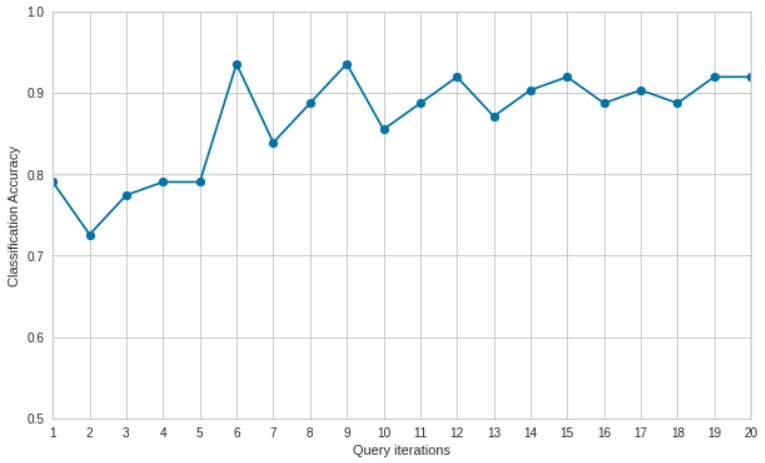


(c) In the second trial, we will use the `Snorkel` to explore the crowdsourcing label. The idea is that each crowd worker can be considered a single labeling function, as each worker labels a subset of data points and may have errors or conflicting labels with other workers. The procedure is as follows: (10%)

- Write the labeling function and apply the labeling function to the training set. You can also directly convert the crowdsourcing data frame to a matrix
- Train the `LabelModel` using the crowdsourcing matrix obtained above (Note that you should not use the ground truth label here) and generate the prediction for each training sample
- Finally, calculate the accuracy of the label on the training set using the ground truth training label

Note that you need to use the following hyperparameters when training the [`LabelModel`](https://snorkel.readthedocs.io/en/master/packages/_autosummary/labeling/snorkel.labeling.model.label_model.LabelModel.html):

```
fit(L_train, n_epochs=500, seed=2023, log_freq=20, l2=0.1, lr=0.001)
```

Hint: If you want to write the label function, you can create one labeling function per worker, return the label the worker submitted for a given sample, and abstain if they didn’t submit a label.

In [ ]:
from snorkel.labeling import labeling_function
from snorkel.labeling import PandasLFApplier
from snorkel.labeling import LFAnalysis
from snorkel.labeling.model import LabelModel
from snorkel.labeling import *
from functools import partial

# 定義標註函數
@labeling_function()
def lf_worker1(x):
    return multiannotator_labels.loc[x.name]['A0001']

@labeling_function()
def lf_worker2(x):
    return multiannotator_labels.loc[x.name]['A0002']

@labeling_function()
def lf_worker3(x):
    return multiannotator_labels.loc[x.name]['A0003']

@labeling_function()
def lf_worker4(x):
    return multiannotator_labels.loc[x.name]['A0004']

@labeling_function()
def lf_worker5(x):
    return multiannotator_labels.loc[x.name]['A0005']

@labeling_function()
def lf_worker6(x):
    return multiannotator_labels.loc[x.name]['A0006']

@labeling_function()
def lf_worker7(x):
    return multiannotator_labels.loc[x.name]['A0007']

@labeling_function()
def lf_worker8(x):
    return multiannotator_labels.loc[x.name]['A0008']

@labeling_function()
def lf_worker9(x):
    return multiannotator_labels.loc[x.name]['A0009']

@labeling_function()
def lf_worker10(x):
    return multiannotator_labels.loc[x.name]['A0010']

@labeling_function()
def lf_worker11(x):
    return multiannotator_labels.loc[x.name]['A0011']

@labeling_function()
def lf_worker12(x):
    return multiannotator_labels.loc[x.name]['A0012']

@labeling_function()
def lf_worker13(x):
    return multiannotator_labels.loc[x.name]['A0013']

@labeling_function()
def lf_worker14(x):
    return multiannotator_labels.loc[x.name]['A0014']

@labeling_function()
def lf_worker15(x):
    return multiannotator_labels.loc[x.name]['A0015']

@labeling_function()
def lf_worker16(x):
    return multiannotator_labels.loc[x.name]['A0016']

@labeling_function()
def lf_worker17(x):
    return multiannotator_labels.loc[x.name]['A0017']

@labeling_function()
def lf_worker18(x):
    return multiannotator_labels.loc[x.name]['A0018']

@labeling_function()
def lf_worker19(x):
    return multiannotator_labels.loc[x.name]['A0019']

@labeling_function()
def lf_worker20(x):
    return multiannotator_labels.loc[x.name]['A0020']

@labeling_function()
def lf_worker21(x):
    return multiannotator_labels.loc[x.name]['A0021']

@labeling_function()
def lf_worker22(x):
    return multiannotator_labels.loc[x.name]['A0022']

@labeling_function()
def lf_worker23(x):
    return multiannotator_labels.loc[x.name]['A0023']

@labeling_function()
def lf_worker24(x):
    return multiannotator_labels.loc[x.name]['A0024']

@labeling_function()
def lf_worker25(x):
    return multiannotator_labels.loc[x.name]['A0025']

@labeling_function()
def lf_worker26(x):
    return multiannotator_labels.loc[x.name]['A0026']

@labeling_function()
def lf_worker27(x):
    return multiannotator_labels.loc[x.name]['A0027']

@labeling_function()
def lf_worker28(x):
    return multiannotator_labels.loc[x.name]['A0028']

@labeling_function()
def lf_worker29(x):
    return multiannotator_labels.loc[x.name]['A0029']

@labeling_function()
def lf_worker30(x):
    return multiannotator_labels.loc[x.name]['A0030']

@labeling_function()
def lf_worker31(x):
    return multiannotator_labels.loc[x.name]['A0031']

@labeling_function()
def lf_worker32(x):
    return multiannotator_labels.loc[x.name]['A0032']

@labeling_function()
def lf_worker33(x):
    return multiannotator_labels.loc[x.name]['A0033']

@labeling_function()
def lf_worker34(x):
    return multiannotator_labels.loc[x.name]['A0034']

@labeling_function()
def lf_worker35(x):
    return multiannotator_labels.loc[x.name]['A0035']

@labeling_function()
def lf_worker36(x):
    return multiannotator_labels.loc[x.name]['A0036']

@labeling_function()
def lf_worker37(x):
    return multiannotator_labels.loc[x.name]['A0037']

@labeling_function()
def lf_worker38(x):
    return multiannotator_labels.loc[x.name]['A0038']

@labeling_function()
def lf_worker39(x):
    return multiannotator_labels.loc[x.name]['A0039']

@labeling_function()
def lf_worker40(x):
    return multiannotator_labels.loc[x.name]['A0040']

@labeling_function()
def lf_worker41(x):
    return multiannotator_labels.loc[x.name]['A0041']

@labeling_function()
def lf_worker42(x):
    return multiannotator_labels.loc[x.name]['A0042']

@labeling_function()
def lf_worker43(x):
    return multiannotator_labels.loc[x.name]['A0043']

@labeling_function()
def lf_worker44(x):
    return multiannotator_labels.loc[x.name]['A0044']

@labeling_function()
def lf_worker45(x):
    return multiannotator_labels.loc[x.name]['A0045']

@labeling_function()
def lf_worker46(x):
    return multiannotator_labels.loc[x.name]['A0046']

@labeling_function()
def lf_worker47(x):
    return multiannotator_labels.loc[x.name]['A0047']

@labeling_function()
def lf_worker48(x):
    return multiannotator_labels.loc[x.name]['A0048']

@labeling_function()
def lf_worker49(x):
    return multiannotator_labels.loc[x.name]['A0049']

@labeling_function()
def lf_worker50(x):
    return multiannotator_labels.loc[x.name]['A0050']
lfs = [lf_worker1, lf_worker2, lf_worker3, lf_worker4, lf_worker5, lf_worker6,
       lf_worker7, lf_worker8, lf_worker9, lf_worker10, lf_worker11,
       lf_worker12, lf_worker13, lf_worker14, lf_worker15, lf_worker16,
       lf_worker17, lf_worker18, lf_worker19, lf_worker20, lf_worker21,
       lf_worker22, lf_worker23, lf_worker24, lf_worker25, lf_worker26,
       lf_worker27, lf_worker28, lf_worker29, lf_worker30, lf_worker31,
       lf_worker32, lf_worker33, lf_worker34, lf_worker35, lf_worker36,
       lf_worker37, lf_worker38, lf_worker39, lf_worker40, lf_worker41,
       lf_worker42, lf_worker43, lf_worker44, lf_worker45, lf_worker46,
       lf_worker47, lf_worker48, lf_worker49, lf_worker50]

# 將所有的標註函數應用於訓練集上，得到一個多維標註矩陣
applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=X_train)

# 初始化LabelModel模型，並用多維標註矩陣進行訓練
label_model = LabelModel(cardinality=3, verbose=True)
label_model.fit(L_train, n_epochs=500, seed=2023, log_freq=20, l2=0.1, lr=0.001)

# 在訓練集上生成預測標籤
Y_train_pred = label_model.predict(L_train)

# 計算模型在訓練集上的準確度
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(Y_train, Y_train_pred)
print("\n",f"Training Accuracy: {train_acc:3f}")

100%|██████████| 500/500 [00:01<00:00, 476.72epoch/s]


 Training Accuracy: 0.827027


> Ans: *Training Accuracy: 0.827027*

(d) In the third trial, we will use the [`cleanlab`](https://github.com/cleanlab/cleanlab) to explore the crowdsourcing label. The procedure is as follows: (10%)

- Firstly, get the majority vote labels using `get_majority_vote_label()` and compute out-of-sample predicted probabilities using 5-fold cross-validation for each sample using the training set with the majority vote labels. The model you use here should be the same as the one you use in (a)
- Use the `get_label_quality_multiannotator()` from cleanlab to get consensus labels by combining the out-of-sample predicted probabilities and the crowdsourcing label
- Finally, calculate the accuracy of both the majority and consensus label on the training set using the ground truth training label

In [ ]:
#!pip install cleanlab==1.0.1
import cleanlab
from cleanlab.multiannotator import get_label_quality_multiannotator, get_majority_vote_label
from cleanlab.classification import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from cleanlab.pruning import get_noise_indices
from cleanlab.util import value_counts
from cleanlab.latent_estimation import estimate_py_noise_matrices_and_cv_pred_proba
from cleanlab.latent_algebra import compute_inv_noise_matrix

# Majority vote labels
majority_vote_labels = get_majority_vote_label(multiannotator_labels)

# Logistic model
lr_model = LogisticRegression(random_state=2023)
lnl = CleanLearning(clf=lr_model, seed=2023)
lnl.fit(X_train, majority_vote_labels)
psx = cross_val_predict(lnl.clf, X_train, Y_train, cv=5, method='predict_proba')
consensus = get_label_quality_multiannotator(
    multiannotator_labels, 
    psx, 
    consensus_method='best_quality', quality_method='crowdlab', 
    calibrate_probs=True, return_detailed_quality=False, 
    return_annotator_stats=False, return_weights=False, verbose=False)

# Calculate accuracy on training set
print("Accuracy using majority vote labels on training set:", accuracy_score(Y_train, majority_vote_labels))
print("Accuracy using consensus labels on training set:", accuracy_score(Y_train, consensus))



Accuracy using majority vote labels on training set: 0.8108108108108109


ValueError: ignored

> Ans: *Accuracy using majority vote labels on training set: 0.8108108108108109*

(e) Train three logistic regression classifiers with the same hyperparameters as (a) using the labels obtained from `Snorkel` in (c) and the majority-vote and consensus labels from (d). Report the classification accuracy on the test set. Which one performs best? (5%)

In [ ]:
# coding your answer here.
#(a)0.7903225806451613
#(c)
@labeling_function()
def lf_worker1(x):
    return ano_unseen.loc[x.name]['A0001']

@labeling_function()
def lf_worker2(x):
    return ano_unseen.loc[x.name]['A0002']

@labeling_function()
def lf_worker3(x):
    return ano_unseen.loc[x.name]['A0003']

@labeling_function()
def lf_worker4(x):
    return ano_unseen.loc[x.name]['A0004']

@labeling_function()
def lf_worker5(x):
    return ano_unseen.loc[x.name]['A0005']

@labeling_function()
def lf_worker6(x):
    return ano_unseen.loc[x.name]['A0006']

@labeling_function()
def lf_worker7(x):
    return ano_unseen.loc[x.name]['A0007']

@labeling_function()
def lf_worker8(x):
    return ano_unseen.loc[x.name]['A0008']

@labeling_function()
def lf_worker9(x):
    return ano_unseen.loc[x.name]['A0009']

@labeling_function()
def lf_worker10(x):
    return ano_unseen.loc[x.name]['A0010']

@labeling_function()
def lf_worker11(x):
    return ano_unseen.loc[x.name]['A0011']

@labeling_function()
def lf_worker12(x):
    return ano_unseen.loc[x.name]['A0012']

@labeling_function()
def lf_worker13(x):
    return ano_unseen.loc[x.name]['A0013']

@labeling_function()
def lf_worker14(x):
    return ano_unseen.loc[x.name]['A0014']

@labeling_function()
def lf_worker15(x):
    return ano_unseen.loc[x.name]['A0015']

@labeling_function()
def lf_worker16(x):
    return ano_unseen.loc[x.name]['A0016']

@labeling_function()
def lf_worker17(x):
    return ano_unseen.loc[x.name]['A0017']

@labeling_function()
def lf_worker18(x):
    return ano_unseen.loc[x.name]['A0018']

@labeling_function()
def lf_worker19(x):
    return ano_unseen.loc[x.name]['A0019']

@labeling_function()
def lf_worker20(x):
    return ano_unseen.loc[x.name]['A0020']

@labeling_function()
def lf_worker21(x):
    return ano_unseen.loc[x.name]['A0021']

@labeling_function()
def lf_worker22(x):
    return ano_unseen.loc[x.name]['A0022']

@labeling_function()
def lf_worker23(x):
    return ano_unseen.loc[x.name]['A0023']

@labeling_function()
def lf_worker24(x):
    return ano_unseen.loc[x.name]['A0024']

@labeling_function()
def lf_worker25(x):
    return ano_unseen.loc[x.name]['A0025']

@labeling_function()
def lf_worker26(x):
    return ano_unseen.loc[x.name]['A0026']

@labeling_function()
def lf_worker27(x):
    return ano_unseen.loc[x.name]['A0027']

@labeling_function()
def lf_worker28(x):
    return ano_unseen.loc[x.name]['A0028']

@labeling_function()
def lf_worker29(x):
    return ano_unseen.loc[x.name]['A0029']

@labeling_function()
def lf_worker30(x):
    return ano_unseen.loc[x.name]['A0030']

@labeling_function()
def lf_worker31(x):
    return ano_unseen.loc[x.name]['A0031']

@labeling_function()
def lf_worker32(x):
    return ano_unseen.loc[x.name]['A0032']

@labeling_function()
def lf_worker33(x):
    return ano_unseen.loc[x.name]['A0033']

@labeling_function()
def lf_worker34(x):
    return ano_unseen.loc[x.name]['A0034']

@labeling_function()
def lf_worker35(x):
    return ano_unseen.loc[x.name]['A0035']

@labeling_function()
def lf_worker36(x):
    return ano_unseen.loc[x.name]['A0036']

@labeling_function()
def lf_worker37(x):
    return ano_unseen.loc[x.name]['A0037']

@labeling_function()
def lf_worker38(x):
    return ano_unseen.loc[x.name]['A0038']

@labeling_function()
def lf_worker39(x):
    return ano_unseen.loc[x.name]['A0039']

@labeling_function()
def lf_worker40(x):
    return ano_unseen.loc[x.name]['A0040']

@labeling_function()
def lf_worker41(x):
    return ano_unseen.loc[x.name]['A0041']

@labeling_function()
def lf_worker42(x):
    return ano_unseen.loc[x.name]['A0042']

@labeling_function()
def lf_worker43(x):
    return ano_unseen.loc[x.name]['A0043']

@labeling_function()
def lf_worker44(x):
    return ano_unseen.loc[x.name]['A0044']

@labeling_function()
def lf_worker45(x):
    return ano_unseen.loc[x.name]['A0045']

@labeling_function()
def lf_worker46(x):
    return ano_unseen.loc[x.name]['A0046']

@labeling_function()
def lf_worker47(x):
    return ano_unseen.loc[x.name]['A0047']

@labeling_function()
def lf_worker48(x):
    return ano_unseen.loc[x.name]['A0048']

@labeling_function()
def lf_worker49(x):
    return ano_unseen.loc[x.name]['A0049']

@labeling_function()
def lf_worker50(x):
    return ano_unseen.loc[x.name]['A0050']
lfs = [lf_worker1, lf_worker2, lf_worker3, lf_worker4, lf_worker5, lf_worker6,
       lf_worker7, lf_worker8, lf_worker9, lf_worker10, lf_worker11,
       lf_worker12, lf_worker13, lf_worker14, lf_worker15, lf_worker16,
       lf_worker17, lf_worker18, lf_worker19, lf_worker20, lf_worker21,
       lf_worker22, lf_worker23, lf_worker24, lf_worker25, lf_worker26,
       lf_worker27, lf_worker28, lf_worker29, lf_worker30, lf_worker31,
       lf_worker32, lf_worker33, lf_worker34, lf_worker35, lf_worker36,
       lf_worker37, lf_worker38, lf_worker39, lf_worker40, lf_worker41,
       lf_worker42, lf_worker43, lf_worker44, lf_worker45, lf_worker46,
       lf_worker47, lf_worker48, lf_worker49, lf_worker50]
applier = PandasLFApplier(lfs=lfs)
L_test = applier.apply(df=X_test)

# 初始化LabelModel模型，並用多維標註矩陣進行訓練
label_model = LabelModel(cardinality=3, verbose=True)
label_model.fit(L_train, n_epochs=500, seed=2023, log_freq=20, l2=0.1, lr=0.001)

# 在測試集上生成預測標籤
Y_test_pred = label_model.predict(L_test)

# 計算模型在訓練集上的準確度
from sklearn.metrics import accuracy_score
TrainmodelonTestSet_acc = accuracy_score(Y_test, Y_test_pred)
print("\n(a)the classification accuracy on the test set:0.7903225806451613")
print("\n",f"(c)the classification accuracy on the test set: {TrainmodelonTestSet_acc:3f}")



100%|██████████| 500/500 [00:01<00:00, 484.34epoch/s]



(a)the classification accuracy on the test set:0.7903225806451613

 (c)the classification accuracy on the test set: 0.870968


> Ans: *從我有成功做出來的在(c)使用snorkel有比較好的表現，準確率約有0.8710*

## Q3: Analyze Github repositories dataset using SQL

Kaggle has a rich number of [BigQuery](https://www.kaggle.com/datasets?fileType=bigQuery) and [SQLite](https://www.kaggle.com/datasets?fileType=sqlite) datasets that you can practice your SQL skill.

Assuming in the startup company, we join another project which aims to analyze a big dataset. The dataset is related to Github.  GitHub is the most popular place to collaborate on software projects. A GitHub **repository** (or **repo**) is a collection of files associated with a specific project. Most repos on GitHub are shared under a specific legal license, which determines the legal restrictions on their use. In addition, each project will be written using several programming languages. Finally, there are several statistics that show the popularity of repositories, like the watch number.

<p align="center">
<img src="https://drive.google.com/uc?id=1Z7ubmkY9JQMdHxAHD5O33gYJ0tNS9O-O" alt="drawing" width="1000"/>
</p>

In this example, we are asked to analyze the GitHub repositories dataset provided by our customer and it is hosted on https://www.kaggle.com/datasets/github/github-repos?select=languages.

Hint: Refer to our laboratory for useful commands.

Firstly, if you are using Colab, use the following code snippet to set up the client. For more detail, please refer to our lab.

In [270]:
# @title Setup
from google.cloud import bigquery
from google.oauth2 import service_account

# TODO(developer): Set key_path to the path to the service account key file.

key_path = "/content/drive/MyDrive/Colab Notebooks/assignment1-381208-f3dfed171255.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path
)
project_id = 'assignment1-381203'
client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

%load_ext google.cloud.bigquery
%load_ext google.colab.data_table


The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery
The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


(a) In the first stage, explore the dataset using the following procedure: (10%)

- Print the names of all tables available in the dataset. 
- Print the table schema of the `languages` , `sample_repos` and the `licenses` tables.
- Preview the first ten rows of the above three tables by retrieving the data frame

Hint: the dataset can be access via `dataset_ref = client.dataset("github_repos", project="bigquery-public-data")`

In [ ]:
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")
# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)
# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))
# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

# print languages,sample_repos and licenses
table_ref = dataset_ref.table("languages")
table = client.get_table(table_ref)
print("languages:",table.schema)
print(client.list_rows(table, max_results=10).to_dataframe())
table_ref = dataset_ref.table("sample_repos")
table = client.get_table(table_ref)
print("sample_repos:",table.schema)
print(client.list_rows(table, max_results=10).to_dataframe())
table_ref = dataset_ref.table("licenses")
table = client.get_table(table_ref)
print("licenses:",table.schema)
print(client.list_rows(table, max_results=10).to_dataframe())


commits
contents
files
languages
licenses
sample_commits
sample_contents
sample_files
sample_repos
languages: [SchemaField('repo_name', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('language', 'RECORD', 'REPEATED', None, None, (SchemaField('name', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('bytes', 'INTEGER', 'NULLABLE', None, None, (), None)), None)]
                 repo_name                         language
0        lemi136/puntovent     [{'name': 'C', 'bytes': 80}]
1           taxigps/nctool   [{'name': 'C', 'bytes': 4461}]
2              ahy1/strbuf   [{'name': 'C', 'bytes': 5573}]
3      nleiten/mod_rpaf-ng  [{'name': 'C', 'bytes': 30330}]
4      kmcallister/alameda  [{'name': 'C', 'bytes': 17077}]
5            TianYJ1/Snake  [{'name': 'C', 'bytes': 10381}]
6           doctorfree/Lds  [{'name': 'C', 'bytes': 56413}]
7  SumiMakito/ReinaJNIDemo   [{'name': 'C', 'bytes': 7444}]
8         serprex/rainbeam   [{'name': 'C', 'bytes': 1964}]
9        pdigiglio/o

(b) The `licenses` table provides information about the license used by each repository. Please write a query that returns a data frame that contains two columns by following the restrictions below: (10%)

* The first column is `license` from the `licenses` table (Remember the `SELECT... from` clause)
* The second column is `number_of_repos`, which is the number of repositories belonging to each license. (Remember the `COUNT` and `GROUP BY` clauses)
* Filter out the rows whose `number_of_repos` is smaller or equal to 50,000 (Remember the `HAVING` clause)
* Sort the resulting data frame by the `number_of_repos` column in descending order (Remember the `ORDER BY` clause)


In the retrieved data frame, which license is most popular?

In [ ]:
# coding your answer here.
query = """
SELECT license, COUNT(*) AS number_of_repos
FROM `bigquery-public-data.github_repos.licenses`
GROUP BY license
HAVING number_of_repos > 50000
ORDER BY number_of_repos DESC
"""
############   Do not modify the code below     ############ 
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
results = query_job.to_dataframe()
############   Do not modify the code above     ############ 
print(results)

        license  number_of_repos
0           mit          1696489
1    apache-2.0           495134
2       gpl-2.0           341505
3       gpl-3.0           340407
4  bsd-3-clause           150701
5  bsd-2-clause            55221


> Ans: *The most popular license is "mit" which number of repos is 1696489*

(c) The `sample_repos` table contains information about the popularity of each repository. In addition, the `languages` table includes information on the programming language used by each repository. (10%)

Now, write a query that has a single row for each repository. Your results should have three columns (Remember the `SELECT...WHERE` clause) and follow the below restrictions: 

* Restrict the results to rows containing the word 'Python' in the `language` column of the `languages` table. (Remember the `SELECT...WHERE` clause and remember to use `UNNEST` clause)
* The first column `repo_name` contains the `repo_name` column from the `sample_repos` table (Remember the `INNER JOIN` clause)
* The second column `watch_count` contains the `watch_count` column from the `sample_repos` table 
* The third column `language` contains the `language` column from the `languages` table 
* Sort the resulting data frame by the `watch_count` column in descending order (Remember the `ORDER BY` clause)

In the retrieve data frame, which is the most popular repository that is written (Partially or totally) by Python?

Hint: Notice that in the table schema of `language` table, `language` is nested data with the type `REPEATED`.

In [271]:
# coding your answer here.
query = """
SELECT sample_repos.repo_name, sample_repos.watch_count, language
FROM project.dataset.sample_repos as sample_repos
INNER JOIN UNNEST(languages) AS language
ON sample_repos.repo_name = language.repo_name
WHERE language = 'Python'
ORDER BY watch_count DESC
 """

############   Do not modify the code below     ############ 
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
results = query_job.to_dataframe()
############   Do not modify the code above     ############ 
print(results)

Forbidden: ignored

> Ans: *double click here to answer the question.*